# Technical Analysis with Pandas ([pandas_ta](https://github.com/twopirllc/pandas-ta))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api
e = pd.DataFrame()

### Help on Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [2]:
e.ta.indicators()

pandas.ta - Technical Analysis Indicators
Total Indicators: 80
Abbreviations:
    accbands, ad, adosc, adx, ao, apo, aroon, atr, bbands, bop, cci, cmf, cmo, coppock, cross, decreasing, dema, donchian, dpo, efi, ema, eom, fwma, hl2, hlc3, hma, ichimoku, increasing, kc, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvi, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, short_run, skew, sma, stdev, stoch, swma, t3, tema, trend_return, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zlma, zscore


In [19]:
# Individual Indicator help
help(ta.bbands)

Help on function bbands in module pandas_ta.volatility:

bbands(close, length=None, std=None, mamode=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=20, std=2
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length)
        if 'ema':
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
        
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period.  Default: 20
        std (int): The long period.   Default: 2
        mamode (str): Two options: None or 'ema'.  Default: 'ema'
        offset (int): How many periods to offset the result.  Default: 0
    
    Kw

### Load Daily SPY from [AlphaVantage](http://www.alphavantage.com) and clean it up a little

In [23]:
AV = AlphaVantage(premium=False, clean=True, output_size='full')
df = AV.data(symbol='SPY', function='D') # Daily
df.name = 'SPY'
df.set_index(['date'], inplace=True)

In [24]:
last_ = df.shape[0]
# last_ = 200 # Uncomment for remaining subset
print(f"{df.name}{df.shape}")
df.head()

SPY(5361, 5)


,open,high,low,close,volume
date,,,,,
1998-01-02,97.3125,97.6562,96.5312,97.5625,2360900.0
1998-01-05,97.8437,98.4375,96.7812,97.7812,4191800.0
1998-01-06,97.2500,97.2812,96.1875,96.2187,3154900.0
1998-01-07,96.0937,96.7187,95.2187,96.4687,4424200.0
1998-01-08,96.3125,96.3125,95.3750,95.6250,3831000.0


## Create some constants for some indicators

In [25]:
#help(df.ta.constants) # for more info
df.ta.constants(True, -4, 4)
df.tail()

,open,high,low,close,volume,-4,-3,-2,-1,0,1,2,3,4
date,,,,,,,,,,,,,,
2019-04-17,291.40,291.425,288.99,289.45,58268295.0,-4,-3,-2,-1,0,1,2,3,4
2019-04-18,290.10,290.320,288.66,290.02,68708513.0,-4,-3,-2,-1,0,1,2,3,4
2019-04-22,289.17,290.435,289.07,290.27,40160140.0,-4,-3,-2,-1,0,1,2,3,4
2019-04-23,290.68,293.140,290.42,292.88,52246633.0,-4,-3,-2,-1,0,1,2,3,4
2019-04-24,292.79,293.160,292.07,292.23,50220562.0,-4,-3,-2,-1,0,1,2,3,4


## Price Chart with Moving Averages

In [26]:
def machart(kind, fast, medium, slow, append=True, last=last_, figsize=(16,8), signal=None):
    ma1 = df.ta(kind=kind, length=fast, append=append)
    ma2 = df.ta(kind=kind, length=medium, append=append)
    ma3 = df.ta(kind=kind, length=slow, append=append)
    pricedf = df[['close', ma1.name, ma2.name, ma3.name]]
    title = f"{df.name}: {kind.upper()}s from {df.index[0]} to {df.index[-1]} ({last})"
    pricedf = df[['close', ma1.name, ma2.name, ma3.name]]
    pricedf.tail(last).plot(figsize=figsize, color=['black', 'green', 'orange', 'red'], title=title)

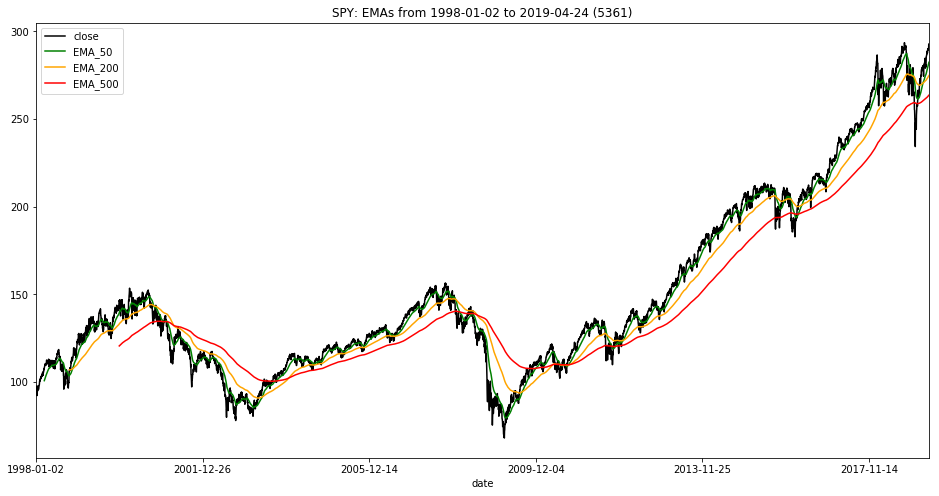

In [27]:
machart('ema', 50, 200, 500)

## Indicator Examples
* Examples of simple and complex indicators.  Most indicators return a Series, while a few return DataFrames.
* All indicators can be called one of three ways. Either way, they return the result.

### Three ways to use pandas_ta
1. Stand Alone like TA-Lib  ta.**indicator**(*kwargs*).
2. As a DataFrame Extension like df.ta.**indicator**(*kwargs*).  Where df is a DataFrame with columns named 'open', 'high', 'low', 'close, 'volume' for simplicity.
3. Similar to #2, but by calling: df.ta(kind='**indicator**', *kwargs*).

### Cumulative Log Return

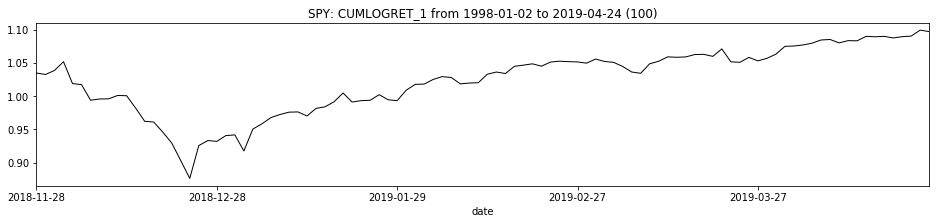

In [28]:
clr = df.ta.log_return(cumulative=True, append=True)
# df[['0', f"{clr.name}"]].tail(100).plot(figsize=(16, 3), color=['black'], linewidth=1, title=f"{df.name}: {clr.name} from {df.index[0]} to {df.index[-1]} ({last_})")
df[clr.name].tail(100).plot(figsize=(16, 3), color=['black'], linewidth=1, title=f"{df.name}: {clr.name} from {df.index[0]} to {df.index[-1]} (100)")

### MACD

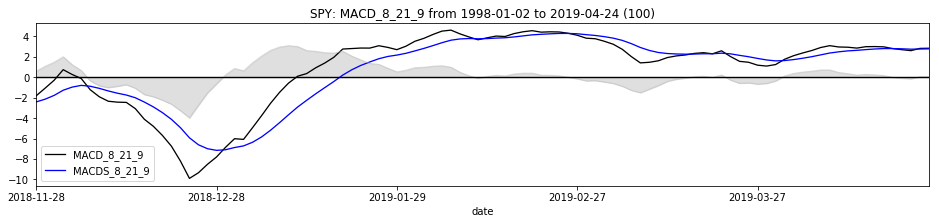

In [29]:
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].tail(100).plot(figsize=(16, 3), color=['black', 'blue'], linewidth=1.3)
macddf[macddf.columns[1]].tail(100).plot.area(figsize=(16, 3), stacked=False, color=['silver'], linewidth=1, title=f"{df.name}: {macddf.name} from {df.index[0]} to {df.index[-1]} (100)")
df['0'].tail(100).plot(figsize=(16, 3), color=['black'], linewidth=1.4)

### ZScore

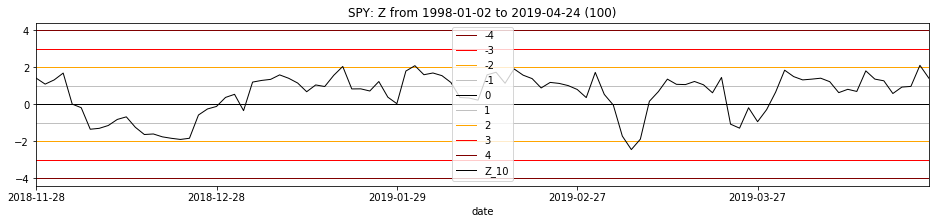

In [30]:
df.ta.zscore(length=10, append=True)
zcolors = ['maroon', 'red', 'orange', 'silver', 'black', 'silver', 'orange', 'red', 'maroon', 'black', 'blue']
df[['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'Z_10']].tail(100).plot(figsize=(16, 3), color=zcolors, linewidth=1, title=f"{df.name}: Z from {df.index[0]} to {df.index[-1]} (100)")

# New Features

### Long Run and Short Run
Long Run (__long_run__) returns 1 if fast and slow averages approach each other from the below or both are increasing.  Otherwise returns 0.

Conversely, Short Run (__short_run__) returns 1 if fast and slow averages approach each other from above or both are decreasing.  Otherwise returns 0.

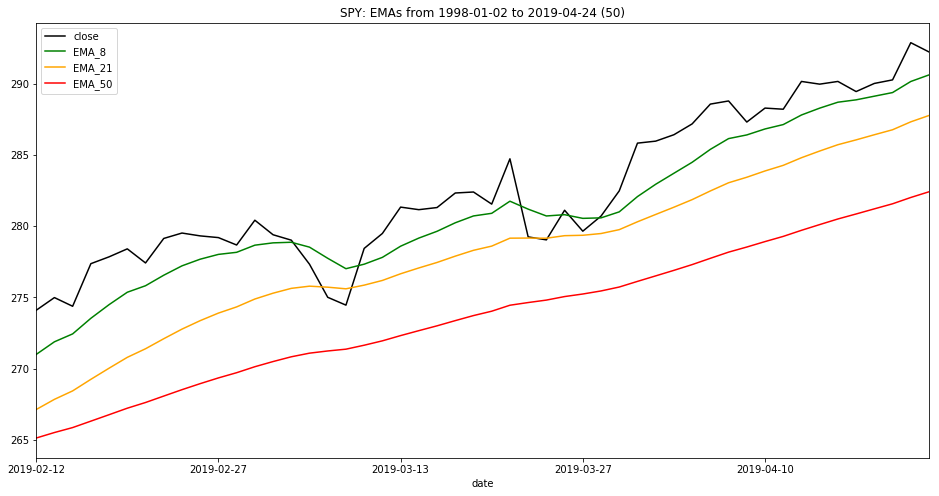

In [31]:
machart('ema', 8, 21, 50, last=50)

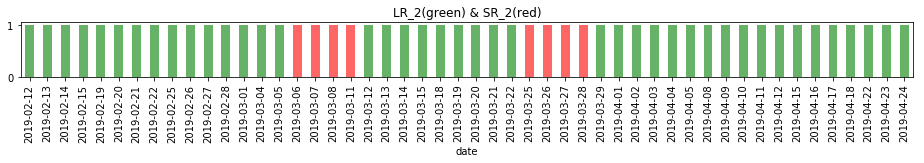

In [32]:
ema8 = df.ta.ema(length=8)
ema21 = df.ta.ema(length=21)
lrun = df.ta.long_run(ema8, ema21, append=False)
srun = df.ta.short_run(ema8, ema21, append=False)
srun.tail(50).plot(kind='bar', figsize=(16,1), color=['red'], linewidth=1, alpha=0.6)
lrun.tail(50).plot(kind='bar', figsize=(16,1), color=['green'], linewidth=1, alpha=0.6, title=f"{lrun.name}(green) & {srun.name}(red)")

### Cross
Cross (__cross__) returns 1 if two series cross and 0 if they do not.  By default, above=True.

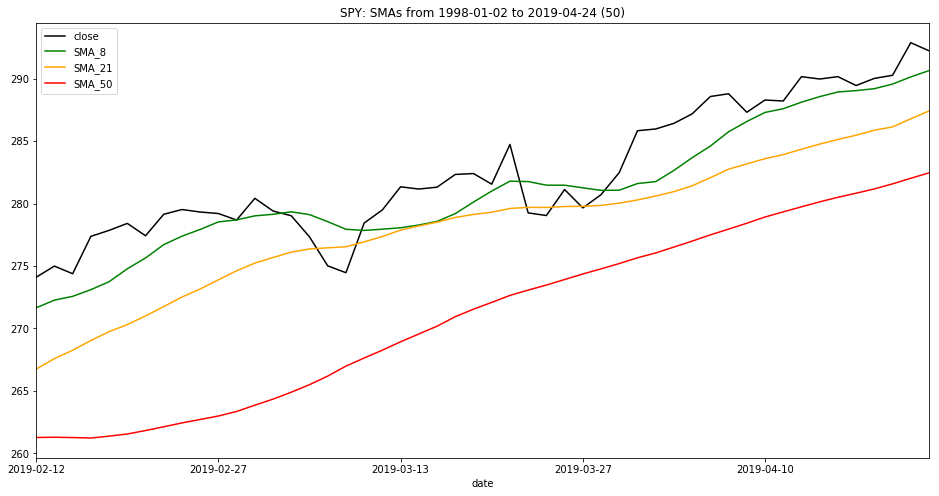

In [33]:
machart('sma', 8, 21, 50, last=50)

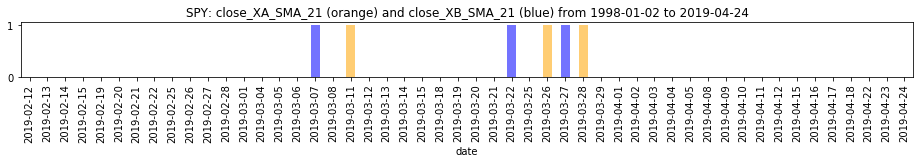

In [34]:
maf = df.ta(kind='sma', length=21)
cross_above = ta.cross(df['close'], maf, above=True)
cross_above.tail(50).plot(kind='bar', figsize=(16, 1), color=['orange'], linewidth=1, alpha=0.55, stacked=False)

cross_below = ta.cross(df['close'], maf, above=False)
cross_below.tail(50).plot(kind='bar', figsize=(16, 1), color=['blue'], linewidth=1, alpha=0.55, stacked=False, title=f"{df.name}: {cross_above.name} (orange) and {cross_below.name} (blue) from {df.index[0]} to {df.index[-1]}")

In [35]:
print(f"Most recent {cross_above.name} Dates:  {', '.join(list(cross_above[cross_above > 0].tail(6).index[::-1]))}")
print(f"Most recent {cross_below.name} Dates:  {', '.join(list(cross_below[cross_below > 0].tail(6).index[::-1]))}")

Most recent close_XA_SMA_21 Dates:  2019-03-28, 2019-03-26, 2019-03-11, 2019-01-07, 2018-11-28, 2018-11-15
Most recent close_XB_SMA_21 Dates:  2019-03-27, 2019-03-22, 2019-03-07, 2018-12-04, 2018-11-19, 2018-11-12


### Trend Return
* Trend Return (__trend_return__) calculates the cumulative log returns from a specified trend.
* There is no limit on how to construct a trend.  It can be as simple as: close > SMA(close, 50).

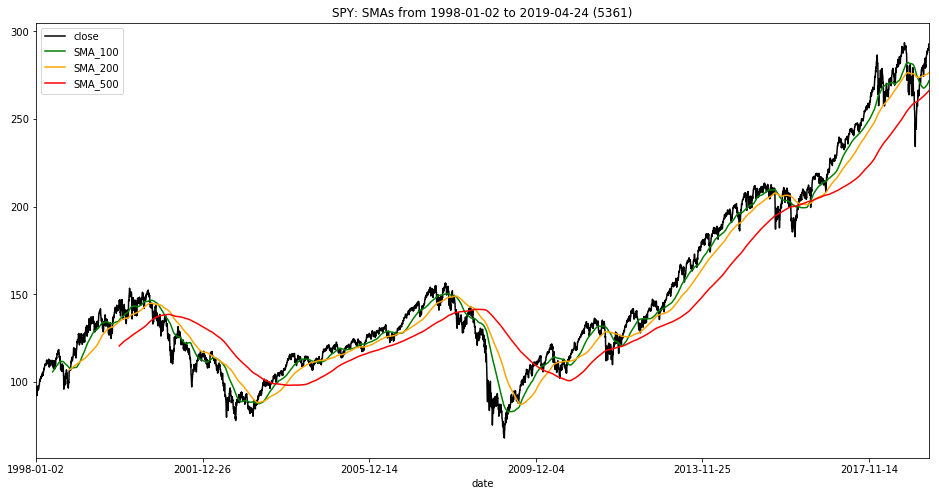

In [36]:
machart('sma', 100, 200, 500)#, last=50)

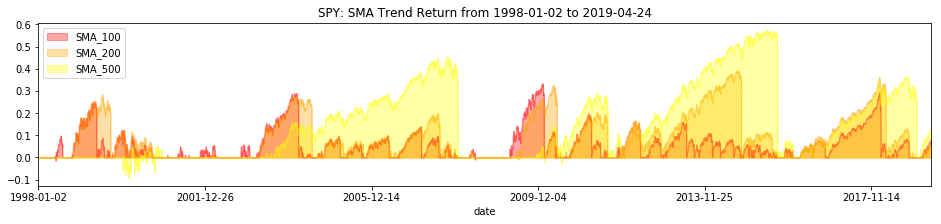

In [37]:
def ma_strategy(kind, fast, medium, slow, cumulative=True, variable=False, last=last_):
    """A very basic analysis of the closing price being greater than each moving average"""
    last = last if last is not None else df.shape[0]
    closedf = df['close']
    maf = df.ta(kind=kind, length=fast)
    mam = df.ta(kind=kind, length=medium)
    mas = df.ta(kind=kind, length=slow)
    tdf = pd.DataFrame({
        maf.name: ta.trend_return(closedf, closedf > maf, cumulative=cumulative, variable=variable),
        mam.name: ta.trend_return(closedf, closedf > mam, cumulative=cumulative, variable=variable),
        mas.name: ta.trend_return(closedf, closedf > mas, cumulative=cumulative, variable=variable),
    })
    tdf.set_index(closedf.index, inplace=True)
    window = tdf.tail(last)
    title = f"{df.name}: {kind.upper()} Trend Return from {window.index[0]} to {window.index[-1]}"
    window.plot.area(figsize=(16, 3), color=['red', 'orange', 'yellow'], linewidth=1, alpha=0.35, title=title, stacked=False)

ma_strategy('sma', 100, 200, 500)#, last=50)